<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/unsupervised/cluster-insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/notebooks/classic/insurance-customers-1500.csv', sep=';')

In [0]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

def plot_dataset(X, y_pred=[0]):
    # last color is black to properly display label -1 as noise (black)
    colors = np.append(np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1)))), ['#000000'])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

In [0]:
X = df[['age', 'speed']].values

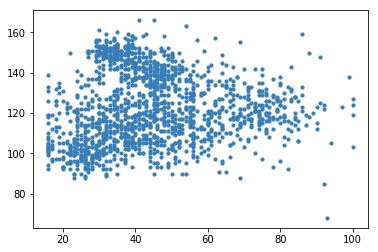

In [4]:
plot_dataset(X)

## K Means

In [5]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
y_pred = clf.predict(X)
y_pred

array([1, 2, 1, ..., 0, 1, 2], dtype=int32)

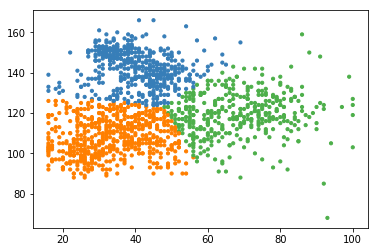

In [7]:
plot_dataset(X, y_pred)

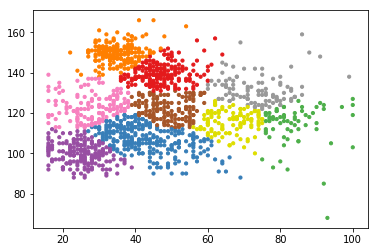

In [8]:
# from sklearn.cluster import MiniBatchKMeans
# clf = MiniBatchKMeans(n_clusters=10)

clf = KMeans(n_clusters=10)
clf.fit(X)
y_pred = clf.predict(X)
plot_dataset(X, y_pred)

## Scaling does not make a big difference for k-means

In [0]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

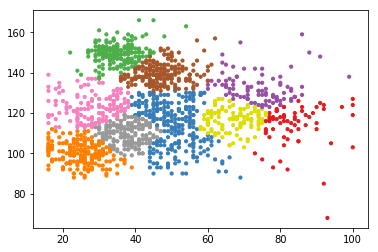

In [22]:
clf = KMeans(n_clusters=10)
clf.fit(X_scaled)
y_pred = clf.predict(X_scaled)
plot_dataset(X, y_pred)

### k-means gives us more information on clusters 

In [34]:
clf = KMeans(n_clusters=15)
clf.fit(X)
clf.cluster_centers_

array([[ 80.87628866, 121.48453608],
       [ 37.65277778, 106.95138889],
       [ 34.73958333, 150.09895833],
       [ 49.79824561, 116.93859649],
       [ 25.58888889, 115.5       ],
       [ 24.79190751,  98.88439306],
       [ 58.859375  , 130.921875  ],
       [ 52.41304348, 101.05434783],
       [ 44.        , 136.67142857],
       [ 73.4375    , 135.79166667],
       [ 66.04081633, 114.96938776],
       [ 24.44186047, 131.8372093 ],
       [ 82.9375    ,  97.875     ],
       [ 49.40243902, 145.57317073],
       [ 38.22429907, 122.75700935]])

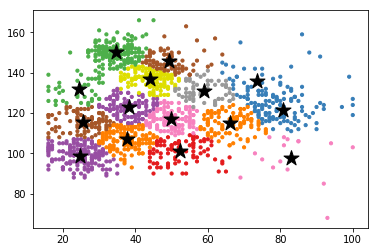

In [35]:
y_pred = clf.predict(X)

plot_dataset(X, y_pred)
plt.scatter(clf.cluster_centers_[:, [0]],
            clf.cluster_centers_[:, [1]], marker='*', s=250,
            color='black', label='Centers');

## DBSCAN 

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
DBSCAN?

In [13]:
clf = DBSCAN()
clf.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

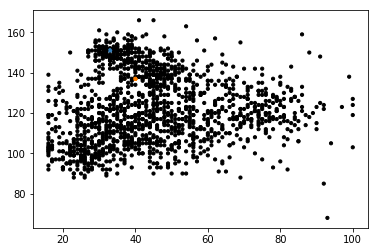

In [14]:
# black is outlier
y_pred = clf.labels_.astype(np.int)

plot_dataset(X, y_pred)

## DBSCAN is sensitive to scaling and density

* Choosing epsilon can be really handwavy
* scaling before clustering can simplify the process

In [15]:
clf = DBSCAN(eps=1.5)
clf.fit(X)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [16]:
clf.labels_

array([-1,  0, -1, ...,  3,  1, -1])

In [17]:
unique_labels = set(clf.labels_)
len(unique_labels)

40

In [18]:
contains_noise = -1 in clf.labels_
contains_noise

True

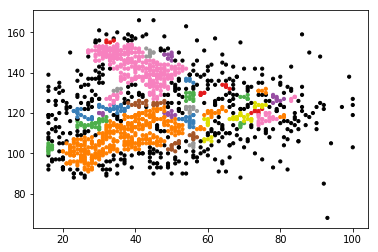

In [19]:
y_pred = clf.labels_.astype(np.int)
plot_dataset(X, y_pred)

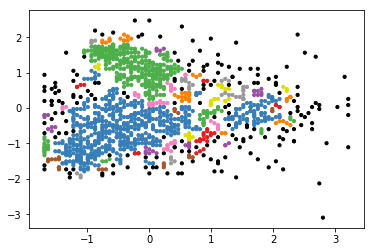

In [36]:
clf = DBSCAN(eps=0.1, min_samples=3)
clf.fit(X_scaled)
y_pred = clf.labels_.astype(np.int)
plot_dataset(X_scaled, y_pred)

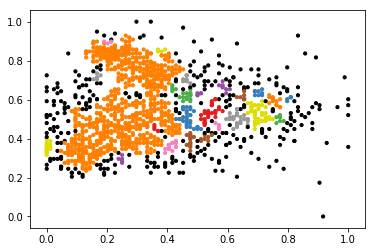

In [21]:
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import MinMaxScaler

X_normalized = MinMaxScaler().fit_transform(X)
# X_normlized = Normalizer().fit_transform(X)
clf = DBSCAN(eps=.022)
clf.fit(X_normalized)
y_pred = clf.labels_.astype(np.int)
plot_dataset(X_normalized, y_pred)

# Exercise

* execute and understand the notebook up to this point
* try clustering on other combinations of features
* you can cluster on more than 2 features, it is just hard to plot more than 2
* tweak the parameters of our two clustering algorithms for good results
* Advanced: choose another clustering algorithm and try it on our data (https://scikit-learn.org/stable/modules/clustering.html)